In [69]:
import json # printing dictionary in readable format
import networkx as nx # for comparing Directed/Undirected graph functionality
from matplotlib import pyplot as plt # visualizing graph network

# Adjacency List Implementation

## Notes on Adjacency Lists

- Space complexity **O(n+m)**, where n = vertices and m = edges.
- Checking for edge **O(n)** because O(1) to index vertex list (or dict in this implementation) and O(n) to walk through linked list to find edge.

## Top Level Function Descriptions

- ```AdjList(graphType)``` creates a new, empty adjacency list. Graph Type specifies whether the networkx's graph for visualization is directed or undirected.

- ```AddVertex(vert)``` adds an instance of Vertex to the graph.

- ```RemVertex(vert)``` adds an instance of Vertex to the graph.

- ```AddEdge(fromVert, toVert, weight)``` Adds a new, directed edge to the graph that connects two vertices. The weight is set to 0 by default to allow for unweighted graphs; however, a weight can be specified.

- ```RemEdge(fromVert, toVert)``` Removes single edge from graph.

In [101]:
class AdjList():
    
    def __init__(self, graphType="directed"):
        
        # Configuration Switches
        self.printEn     = True # enable switch for printing network contents
        self.visualizeEn = True # enable switch for visualizing network
        
        # Data Structure contents
        self.vertices    = dict()
        
        # Network visualization
        if graphType == "directed":
            self.vis = nx.DiGraph()
        else:
            self.vis = nx.Graph()
        return
    
    def AddVertex(self, label):
        if label not in self.vertices:
            print("-I- ({}.AddVertex) adding vertex {}.".format(self.__class__.__name__, label))
            self.vertices[label] = []
            self.vis.add_node(label) # visualization
        else:
            print("-W- ({}.AddVertex) vertices already contains {}".format(self.__class__.__name__, label))
            
    def RemVertex(self, label):
        
        # Remove from visual graph
        self.vis.remove_node(label)
        
        # first remove the vertices element 
        if label in self.vertices:
            print("-I- ({}.RemVertex) Removing vertex {}."\
                .format(self.__class__.__name__, label))
            self.vertices.pop(label, None)
        
        # remove edges for other vertices in vertices
        for keyLabel, valueList in self.vertices.items():
            if label in valueList:
                valueList.remove(label)
            
    def AddEdge(self, labelFrom, labelTo, weight=1):
        if labelFrom in self.vertices and labelTo in self.vertices:
            if labelTo not in self.vertices[labelFrom]:
                print("-I- ({}.AddEdge) Adding edge from {} to {}."\
                      .format(self.__class__.__name__, labelFrom, labelTo))
                      
                self.vertices[labelFrom].append(labelTo)
                self.vis.add_edge(labelFrom, labelTo) # visualization
            else:
                print("-W- ({}.AddEdge) There is already an edge from {} to {}."\
                      .format(self.__class__.__name__, labelFrom, labelTo))
        else:
            print("-W- ({}.AddEdge) vertices does not contain either {} or {}."\
                  .format(self.__class__.__name__, labelFrom, labelTo))
            
    def RemEdge(self, labelFrom, labelTo):
            if labelFrom in self.vertices:
                if labelTo in self.vertices[labelFrom]:
                    print("-I- ({}.RemEdge) Removing edge from {} to {}."\
                        .format(self.__class__.__name__, labelFrom, labelTo))
                    self.vertices[labelFrom].remove(labelTo)
                    self.vis.remove_edge(labelFrom, labelTo)
        
    def PrintStructure(self):
        if self.printEn:
            print("{}\n...".format(json.dumps(self.vertices, indent=4, sort_keys=True)))
            
    def VisualizeStructure(self, node_color="cyan"):
        if self.visualizeEn:
            nx.draw(self.vis, node_color=node_color, with_labels=True)
            plt.show()

## Test Script

- Script accepts instances of class AdjList or its subclasses.
- Performs some vertex/edge additions/deletions and prints struct contents / visualizes it using networkx package.

-I- (AdjList.AddVertex) adding vertex 1.
-W- (AdjList.AddVertex) vertices already contains 1
-I- (AdjList.AddVertex) adding vertex 2.
-I- (AdjList.AddVertex) adding vertex 4.
-I- (AdjList.AddVertex) adding vertex 5.
{
    "1": [],
    "2": [],
    "4": [],
    "5": []
}
...


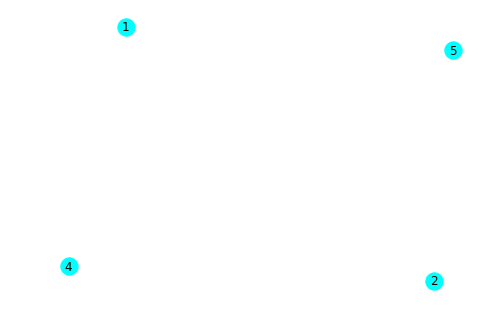

-I- (AdjList.AddEdge) Adding edge from 1 to 2.
-W- (AdjList.AddEdge) There is already an edge from 1 to 2.
-W- (AdjList.AddEdge) vertices does not contain either 1 or 3.
-I- (AdjList.AddEdge) Adding edge from 1 to 4.
-I- (AdjList.AddEdge) Adding edge from 1 to 5.
{
    "1": [
        2,
        4,
        5
    ],
    "2": [],
    "4": [],
    "5": []
}
...


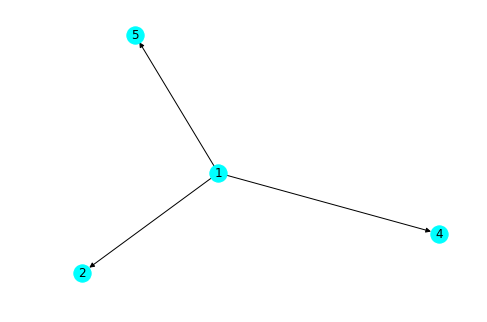

-I- (AdjList.AddEdge) Adding edge from 2 to 1.
-I- (AdjList.AddEdge) Adding edge from 2 to 4.
-I- (AdjList.AddEdge) Adding edge from 5 to 4.
{
    "1": [
        2,
        4,
        5
    ],
    "2": [
        1,
        4
    ],
    "4": [],
    "5": [
        4
    ]
}
...


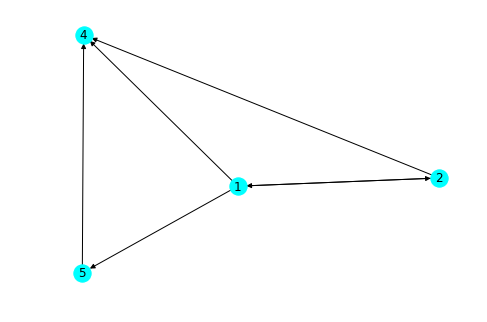

-I- (AdjList.RemEdge) Removing edge from 1 to 2.
{
    "1": [
        4,
        5
    ],
    "2": [
        1,
        4
    ],
    "4": [],
    "5": [
        4
    ]
}
...


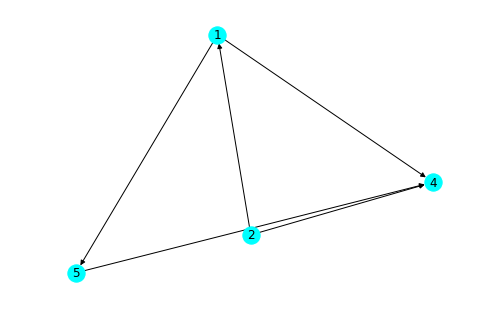

-I- (AdjList.RemVertex) Removing vertex 1.
{
    "2": [
        4
    ],
    "4": [],
    "5": [
        4
    ]
}
...


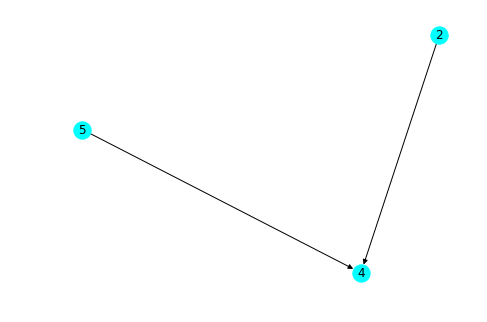

-I- (AdjList.RemVertex) Removing vertex 2.
{
    "4": [],
    "5": [
        4
    ]
}
...


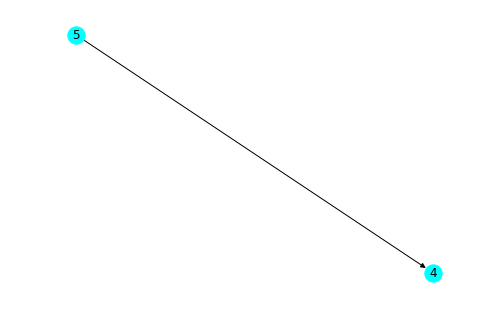

In [102]:
def TEST(uut):
    uut.AddVertex(1)
    uut.AddVertex(1)
    uut.AddVertex(2)
    uut.AddVertex(4)
    uut.AddVertex(5)
    uut.PrintStructure()
    uut.VisualizeStructure()

    uut.AddEdge(1, 2) # valid edge
    uut.AddEdge(1, 2) # not added, already exists
    uut.AddEdge(1, 3) # not added, 3 is not a vertex in the structure yet
    uut.AddEdge(1, 4)
    uut.AddEdge(1, 5)
    uut.PrintStructure()
    uut.VisualizeStructure()

    uut.AddEdge(2,1) # add edge in opposite direction
    uut.AddEdge(2,4) 
    uut.AddEdge(5,4) 
    uut.PrintStructure()
    uut.VisualizeStructure()

    uut.RemEdge(1,2) # removes original edge
    uut.PrintStructure()
    uut.VisualizeStructure()

    uut.RemVertex(1) # remove vertex 1 and any edges related to it
    uut.PrintStructure()
    uut.VisualizeStructure()

    uut.RemVertex(2) # remove vertex 2 and any edges related to it
    uut.PrintStructure()
    uut.VisualizeStructure()
    
TEST(AdjList("directed"))

# Graph Implementation

- Targeting **sparse** graph problems.
- Built on **Adjacency List** to reduce memory usage for a sparse graph.
- **Implicitly** constructed so that graph can be constructed as it is used.
- Allows for **weighted** or **unweighted** usage.
- Two graph implementations for **directed** and **undirected** structures.

-I- (DirectedGraph.AddVertex) adding vertex 1.
-W- (DirectedGraph.AddVertex) vertices already contains 1
-I- (DirectedGraph.AddVertex) adding vertex 2.
-I- (DirectedGraph.AddVertex) adding vertex 4.
-I- (DirectedGraph.AddVertex) adding vertex 5.
{
    "1": [],
    "2": [],
    "4": [],
    "5": []
}
...


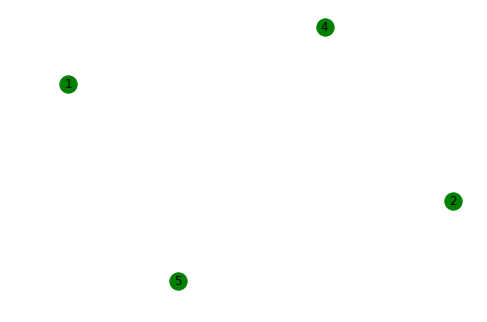

-I- (DirectedGraph.AddEdge) Adding edge from 1 to 2.
-W- (DirectedGraph.AddEdge) There is already an edge from 1 to 2.
-W- (DirectedGraph.AddEdge) vertices does not contain either 1 or 3.
-I- (DirectedGraph.AddEdge) Adding edge from 1 to 4.
-I- (DirectedGraph.AddEdge) Adding edge from 1 to 5.
{
    "1": [
        2,
        4,
        5
    ],
    "2": [],
    "4": [],
    "5": []
}
...


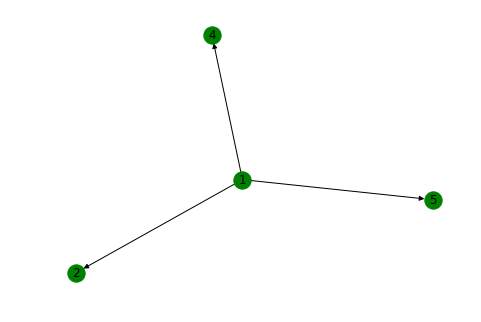

-I- (DirectedGraph.AddEdge) Adding edge from 2 to 1.
-I- (DirectedGraph.AddEdge) Adding edge from 2 to 4.
-I- (DirectedGraph.AddEdge) Adding edge from 5 to 4.
{
    "1": [
        2,
        4,
        5
    ],
    "2": [
        1,
        4
    ],
    "4": [],
    "5": [
        4
    ]
}
...


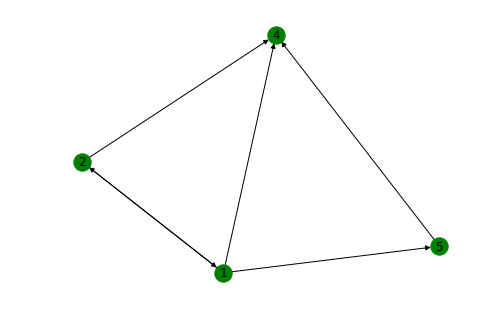

-I- (DirectedGraph.RemEdge) Removing edge from 1 to 2.
{
    "1": [
        4,
        5
    ],
    "2": [
        1,
        4
    ],
    "4": [],
    "5": [
        4
    ]
}
...


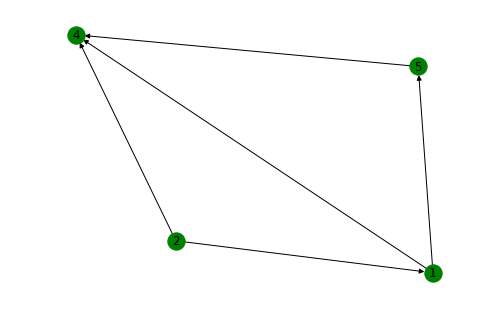

-I- (DirectedGraph.RemVertex) Removing vertex 1.
{
    "2": [
        4
    ],
    "4": [],
    "5": [
        4
    ]
}
...


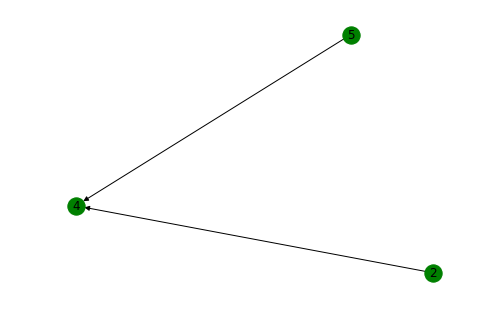

-I- (DirectedGraph.RemVertex) Removing vertex 2.
{
    "4": [],
    "5": [
        4
    ]
}
...


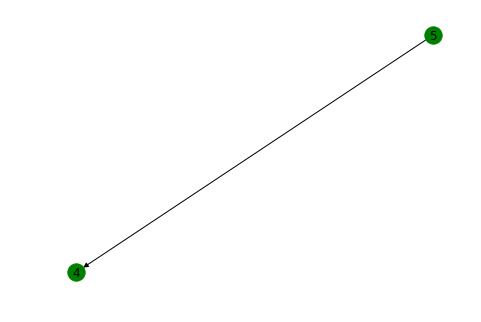

In [103]:
class DirectedGraph(AdjList):
    
    def __init__(self):
        super().__init__("directed")
        return
    
    def AddVertex(self, label):
        super().AddVertex(label)
            
    def RemVertex(self, label):
        super().RemVertex(label)
            
    def AddEdge(self, labelFrom, labelTo, weight=1):
        super().AddEdge(labelFrom, labelTo, weight)
            
    def RemEdge(self, labelFrom, labelTo):
        super().RemEdge(labelFrom, labelTo)
        
    def PrintStructure(self):
        super().PrintStructure()
            
    def VisualizeStructure(self, node_color="green"):
        super().VisualizeStructure(node_color)
        
TEST(DirectedGraph())

-I- (UndirectedGraph.AddVertex) adding vertex 1.
-W- (UndirectedGraph.AddVertex) vertices already contains 1
-I- (UndirectedGraph.AddVertex) adding vertex 2.
-I- (UndirectedGraph.AddVertex) adding vertex 4.
-I- (UndirectedGraph.AddVertex) adding vertex 5.
{
    "1": [],
    "2": [],
    "4": [],
    "5": []
}
...


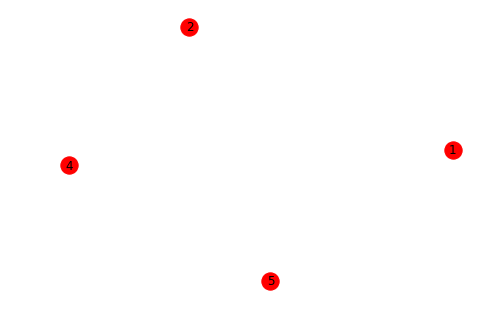

-I- (UndirectedGraph.AddEdge) Adding edge from 1 to 2.
-I- (UndirectedGraph.AddEdge) Adding edge from 2 to 1.
-W- (UndirectedGraph.AddEdge) There is already an edge from 1 to 2.
-W- (UndirectedGraph.AddEdge) There is already an edge from 2 to 1.
-W- (UndirectedGraph.AddEdge) vertices does not contain either 1 or 3.
-W- (UndirectedGraph.AddEdge) vertices does not contain either 3 or 1.
-I- (UndirectedGraph.AddEdge) Adding edge from 1 to 4.
-I- (UndirectedGraph.AddEdge) Adding edge from 4 to 1.
-I- (UndirectedGraph.AddEdge) Adding edge from 1 to 5.
-I- (UndirectedGraph.AddEdge) Adding edge from 5 to 1.
{
    "1": [
        2,
        4,
        5
    ],
    "2": [
        1
    ],
    "4": [
        1
    ],
    "5": [
        1
    ]
}
...


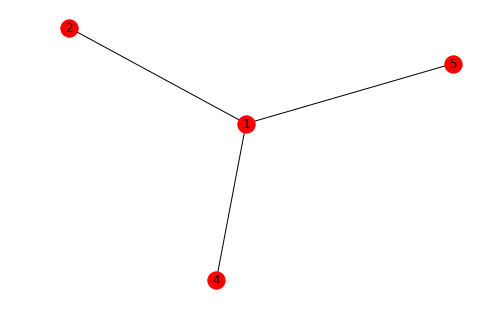

-W- (UndirectedGraph.AddEdge) There is already an edge from 2 to 1.
-W- (UndirectedGraph.AddEdge) There is already an edge from 1 to 2.
-I- (UndirectedGraph.AddEdge) Adding edge from 2 to 4.
-I- (UndirectedGraph.AddEdge) Adding edge from 4 to 2.
-I- (UndirectedGraph.AddEdge) Adding edge from 5 to 4.
-I- (UndirectedGraph.AddEdge) Adding edge from 4 to 5.
{
    "1": [
        2,
        4,
        5
    ],
    "2": [
        1,
        4
    ],
    "4": [
        1,
        2,
        5
    ],
    "5": [
        1,
        4
    ]
}
...


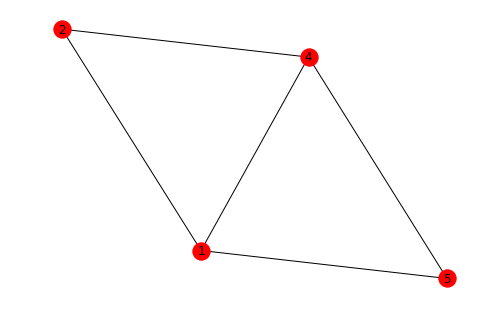

-I- (UndirectedGraph.RemEdge) Removing edge from 1 to 2.
{
    "1": [
        4,
        5
    ],
    "2": [
        1,
        4
    ],
    "4": [
        1,
        2,
        5
    ],
    "5": [
        1,
        4
    ]
}
...


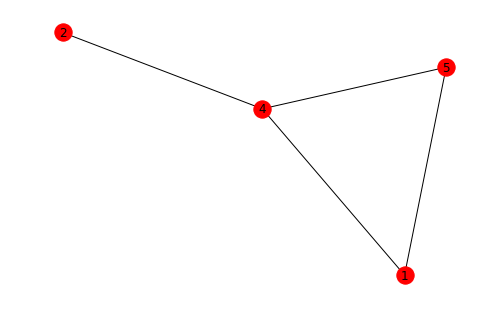

-I- (UndirectedGraph.RemVertex) Removing vertex 1.
{
    "2": [
        4
    ],
    "4": [
        2,
        5
    ],
    "5": [
        4
    ]
}
...


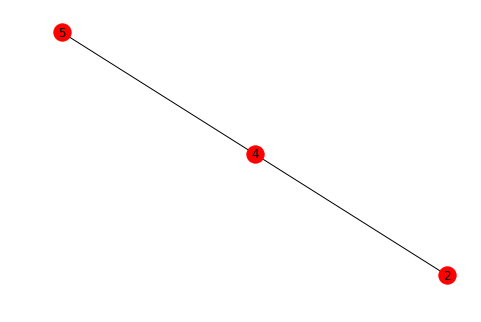

-I- (UndirectedGraph.RemVertex) Removing vertex 2.
{
    "4": [
        5
    ],
    "5": [
        4
    ]
}
...


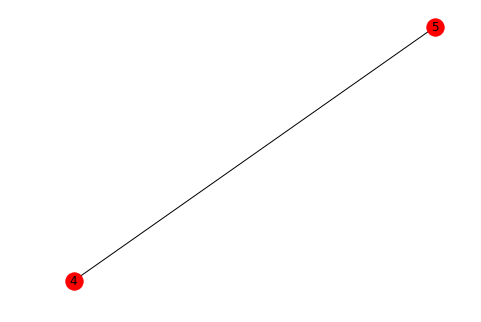

In [104]:
class UndirectedGraph(AdjList):
    
    def __init__(self):
        super().__init__("undirected")
        return
    
    def AddVertex(self, label):
        super().AddVertex(label)
            
    def RemVertex(self, label):
        super().RemVertex(label)
            
    def AddEdge(self, labelFrom, labelTo, weight=1):
        super().AddEdge(labelFrom, labelTo, weight)
        super().AddEdge(labelTo, labelFrom, weight)
            
    def RemEdge(self, labelFrom, labelTo):
        super().RemEdge(labelFrom, labelTo)
        super().RemEdge(labelFrom, labelTo)
        
    def PrintStructure(self):
        super().PrintStructure()
            
    def VisualizeStructure(self, node_color="red"):
        super().VisualizeStructure(node_color)
        
TEST(UndirectedGraph())